In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('apple_quarter.csv')
df.tail()

,Quarter_Date,Apple_Revenue(Millions$US)
59,2006-03-31,4359
60,2005-12-31,5749
61,2005-09-30,3678
62,2005-06-30,3520
63,2005-03-31,3243


In [3]:
company_quarter= df.rename(columns={"Quarter_Date": 'ds', 
                                 "Apple_Revenue(Millions$US)": 'y'})
company_quarter

,ds,y
0,2020-12-31,111439
1,2020-09-30,64698
2,2020-06-30,59685
3,2020-03-31,58313
4,2019-12-31,91819
...,...,...
59,2006-03-31,4359
60,2005-12-31,5749
61,2005-09-30,3678
62,2005-06-30,3520


In [4]:
model = Prophet()
model.fit(company_quarter)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
67,2021-12-31
68,2022-03-31
69,2022-06-30
70,2022-09-30
71,2022-12-31


In [6]:
forecast = model.predict(future)

In [7]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
52,2018-03-31,62389.972420,52327.704590,72145.355687
53,2018-06-30,59095.524210,49283.036838,69535.734775
54,2018-09-30,63204.107610,52649.775106,74249.780018
55,2018-12-31,79885.779469,69620.622252,89608.647925
56,2019-03-31,67658.884011,57461.601953,77445.805455
57,2019-06-30,65346.003959,55039.383567,75323.120734
58,2019-09-30,68773.920532,59067.318476,79567.567119
59,2019-12-31,85324.738821,74988.086586,94928.996191
60,2020-03-31,70713.760253,61218.918710,80074.580700
61,2020-06-30,67754.716604,58734.954575,78197.658471


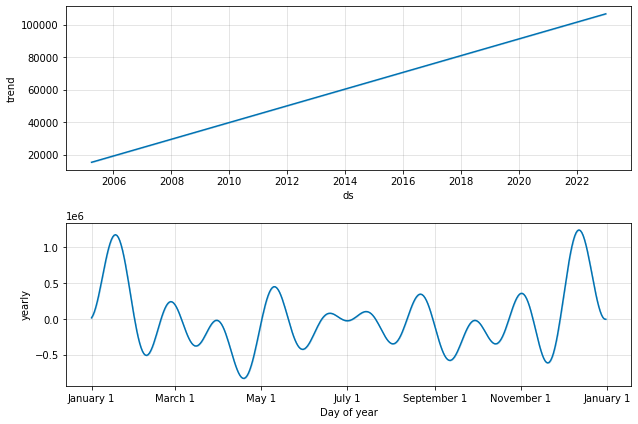

In [8]:

plot2 = model.plot_components(forecast)

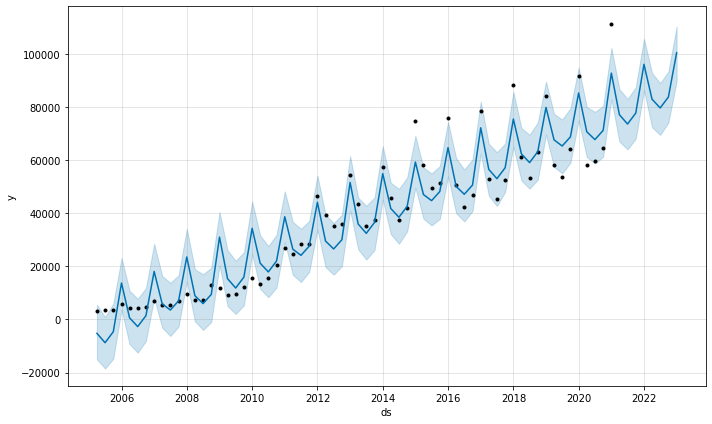

In [9]:

plot1 = model.plot(forecast)